# **Importacion de librerías y lectura del data frame**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [4]:
#Uso este codigo para que sea mas rapido de leer simplemente, sino tardaria mucho mas
import io
import requests
url="https://raw.githubusercontent.com/TFM123456/Big_Data_and_Data_Science_UCM/main/datos_galicia_limpio.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode(encoding = "ISO-8859-1")))

# **DATA WRANGLING INICIAL**

In [5]:
#Le damos orden cronologico a los meses
months = ["enero", "febrero", "marzo", "abril", "mayo", "junio", 
          "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
df['Mes'] = pd.Categorical(df['Mes'], categories=months, ordered=True)

In [6]:
#Eliminamos columnas innecesarias
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [7]:
#Transformamos la columna 'fecha' a tipo numerico para luego dividir mejor las variables
df['fecha'] = pd.to_numeric(df.fecha.str.replace('-',''))
print(df['fecha'])

0        20010220
1        20010225
2        20010413
3        20010413
4        20010413
           ...   
12971    20150809
12972    20150809
12973    20150906
12974    20150908
12975    20150928
Name: fecha, Length: 12976, dtype: int64


In [ ]:
df.head()

superficie     fecha        lat  ...   Año DIR_VIENTO PRES_RANGE
0         5.0  20010220  43.703581  ...  2001          E        4.4
1         1.5  20010225  43.186836  ...  2001         NE        4.7
2         1.5  20010413  43.699889  ...  2001         NE        3.2
3         1.1  20010413  42.758649  ...  2001         NE        3.2
4         1.5  20010413  43.063218  ...  2001         NE        3.2

[5 rows x 27 columns]

### Dividimos el dataset en dos (datos categoricos y numericos)

In [ ]:
df_numericos = df.select_dtypes(exclude=['object','category'])
df_numericos.head(5)

superficie     fecha        lat       lng  ...  RACHA   SOL   Año  PRES_RANGE
0         5.0  20010220  43.703581 -8.038777  ...   16.9  10.2  2001         4.4
1         1.5  20010225  43.186836 -8.685470  ...   11.1  10.2  2001         4.7
2         1.5  20010413  43.699889 -7.984566  ...   13.9  12.1  2001         3.2
3         1.1  20010413  42.758649 -8.917814  ...   13.9  12.1  2001         3.2
4         1.5  20010413  43.063218 -9.235604  ...   13.9  12.1  2001         3.2

[5 rows x 18 columns]

In [ ]:
df_categorico = df.select_dtypes(exclude=['int64','float64'])
#Lo de la columna 'Mes' es un caso a considerar, ya que no es una variable categorica, pero lo transforme a 'category' para darle un orden cronologico
#La columna 'VELMEDIA' tambien es un tema a tratar, tampoco es una variable categorica
df_categorico.head(5)

idprovincia idmunicipio              causa  ... Trimestre      Mes DIR_VIENTO
0    A Coruña     CEDEIRA        negligencia  ...        Q1  febrero          E
1    A Coruña    CARBALLO       intencionado  ...        Q1  febrero         NE
2    A Coruña     CEDEIRA        negligencia  ...        Q2    abril         NE
3    A Coruña     LOUSAME  causa desconocida  ...        Q2    abril         NE
4    A Coruña    MUXÃÂA       intencionado  ...        Q2    abril         NE

[5 rows x 9 columns]

In [ ]:
#De momento queda así el dataset para los analisis

# **ANALISIS PRELIMINAR**

In [ ]:
df.head()

superficie     fecha        lat  ...   Año DIR_VIENTO PRES_RANGE
0         5.0  20010220  43.703581  ...  2001          E        4.4
1         1.5  20010225  43.186836  ...  2001         NE        4.7
2         1.5  20010413  43.699889  ...  2001         NE        3.2
3         1.1  20010413  42.758649  ...  2001         NE        3.2
4         1.5  20010413  43.063218  ...  2001         NE        3.2

[5 rows x 27 columns]

In [ ]:
#Viendo dimensiones del df (29 variables o columnas y 12.976 observaciones o filas)
df.shape

(12976, 27)

In [ ]:
#Tipos de datos
df.dtypes

superficie        float64
fecha               int64
lat               float64
lng               float64
idprovincia        object
idmunicipio        object
causa              object
muertos             int64
heridos             int64
time_ctrl         float64
time_ext          float64
personal            int64
medios              int64
gastos             object
ALTITUD            object
TMEDIA            float64
PRECIPITACION       int64
TMIN              float64
TMAX              float64
VELMEDIA           object
RACHA             float64
SOL               float64
Trimestre          object
Mes              category
Año                 int64
DIR_VIENTO         object
PRES_RANGE        float64
dtype: object

In [ ]:
#Totalidad de registros por columna (NO HAY DATOS FALTANTES)
df.count()

superficie       12976
fecha            12976
lat              12976
lng              12976
idprovincia      12976
idmunicipio      12976
causa            12976
muertos          12976
heridos          12976
time_ctrl        12976
time_ext         12976
personal         12976
medios           12976
gastos           12976
ALTITUD          12976
TMEDIA           12976
PRECIPITACION    12976
TMIN             12976
TMAX             12976
VELMEDIA         12976
RACHA            12976
SOL              12976
Trimestre        12976
Mes              12976
Año              12976
DIR_VIENTO       12976
PRES_RANGE       12976
dtype: int64

In [ ]:
#Resumen               
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   superficie     12976 non-null  float64 
 1   fecha          12976 non-null  int64   
 2   lat            12976 non-null  float64 
 3   lng            12976 non-null  float64 
 4   idprovincia    12976 non-null  object  
 5   idmunicipio    12976 non-null  object  
 6   causa          12976 non-null  object  
 7   muertos        12976 non-null  int64   
 8   heridos        12976 non-null  int64   
 9   time_ctrl      12976 non-null  float64 
 10  time_ext       12976 non-null  float64 
 11  personal       12976 non-null  int64   
 12  medios         12976 non-null  int64   
 13  gastos         12976 non-null  object  
 14  ALTITUD        12976 non-null  object  
 15  TMEDIA         12976 non-null  float64 
 16  PRECIPITACION  12976 non-null  int64   
 17  TMIN           12976 non-null  

In [ ]:
#Principales estadísticos
df.describe().T


count          mean  ...           75%           max
superficie     12976.0  2.586703e+00  ...  3.000000e+00  1.020000e+01
fecha          12976.0  2.005656e+07  ...  2.009023e+07  2.015122e+07
lat            12976.0  4.255542e+01  ...  4.293220e+01  4.373071e+01
lng            12976.0 -7.994614e+00  ... -7.556844e+00 -6.771548e+00
muertos        12976.0  7.706535e-05  ...  0.000000e+00  1.000000e+00
heridos        12976.0  4.623921e-04  ...  0.000000e+00  1.000000e+00
time_ctrl      12976.0  1.781149e+00  ...  2.310000e+00  4.190000e+00
time_ext       12976.0  1.781149e+00  ...  2.310000e+00  4.190000e+00
personal       12976.0  1.228152e+01  ...  1.600000e+01  3.300000e+01
medios         12976.0  1.964396e+00  ...  3.000000e+00  8.000000e+00
TMEDIA         12976.0  1.658466e+01  ...  2.110000e+01  3.120000e+01
PRECIPITACION  12976.0  1.321671e-01  ...  0.000000e+00  1.000000e+00
TMIN           12976.0  9.717810e+00  ...  1.490000e+01  2.340000e+01
TMAX           12976.0  2.345237e+01  ...  2.840000e+01  4.200000e+01
RACHA          12976.0  8.537230e+00  ...  1.060000e+01  2.830000e+01
SOL            12976.0  8.547102e+00  ...  1.120000e+01  1.480000e+01
Año            12976.0  2.005593e+03  ...  2.009000e+03  2.015000e+03
PRES_RANGE     12976.0  3.836675e+00  ...  4.900000e+00  8.600000e+00

[18 rows x 8 columns]

In [ ]:
#Resumen: los datos están relacionados a incendios forestales. Presenta 29 variables y no cuenta con datos faltantes

# **ANALISIS UNIVARIADO**

In [ ]:
#Variable tiempo de extincion del incendio medida en minutos  
df.time_ext.describe()

count    12976.000000
mean         1.781149
std          0.894420
min          0.040000
25%          1.170000
50%          1.500000
75%          2.310000
max          4.190000
Name: time_ext, dtype: float64

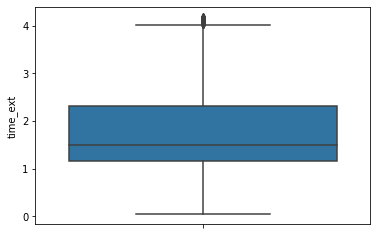

In [ ]:
#La mediana ronda los 1 hora y 5 minutos aprox (menor a la media de 1 hora y 78 minutos). Notamos ciertos outliers por encima de 4 minutos, pero desde el punto de vista práctico..
#..ese tiempo superior en extincion es una posibilidad concreta
from seaborn import boxplot
boxplot(y=df.time_ext, orient='v')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


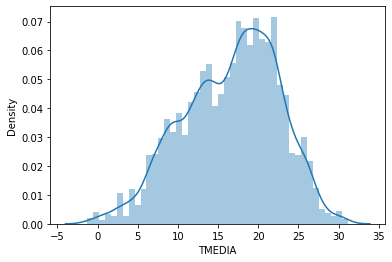

In [ ]:
#Histograma de la temperatura media en incendios
from seaborn import distplot
distplot(df.TMEDIA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


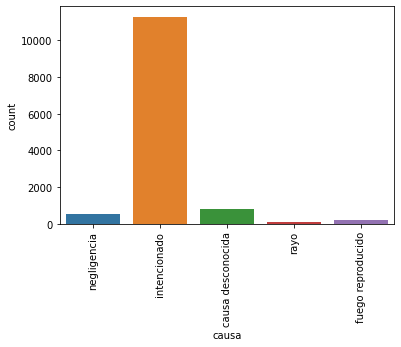

In [ ]:
#Cantidad de incendios por causa. Observamos que prevalece la causa "intencionada".
sns.countplot(df['causa'])
plt.xticks(rotation=90);

In [ ]:
#Frecuencia de las causas (misma info que el grafico anterior). Vemos que tal vez esté un poco desbalanceado el dataset (tema a analizar cuando avancemos en el proyecto)
df.causa.value_counts()

intencionado         11293
causa desconocida      830
negligencia            534
fuego reproducido      215
rayo                   104
Name: causa, dtype: int64

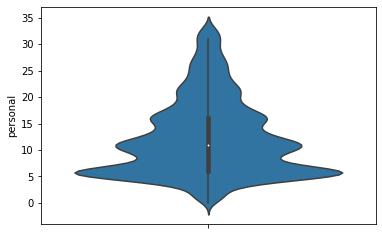

In [ ]:
#Cantidad de personal que intervino. La mediana se observa alrededor de las 10 personas, aunque la mayor cantidad de veces (frecuencia absoluta) intervinieron alrededor de 5 personas
from seaborn import violinplot
violinplot(y=df.personal,data=df, orient="vertical")


In [ ]:
df.personal.describe()

count    12976.000000
mean        12.281520
std          7.252796
min          0.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         33.000000
Name: personal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


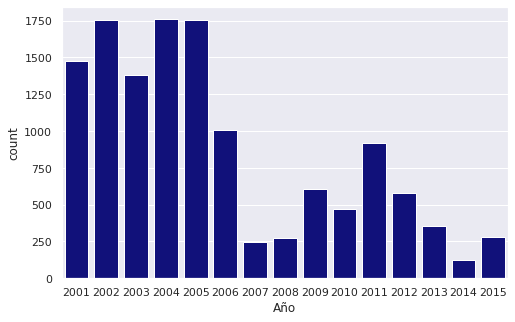

In [ ]:
#Cantidad de incendios por año. Observamos que la cantidad de incendio fue mayor en los primeros años observados (2001 a 2005)
sns.set(rc = {'figure.figsize':(8,5)})
sns.countplot(df['Año'],color='darkblue')

# **ANALISIS BIVARIADO**

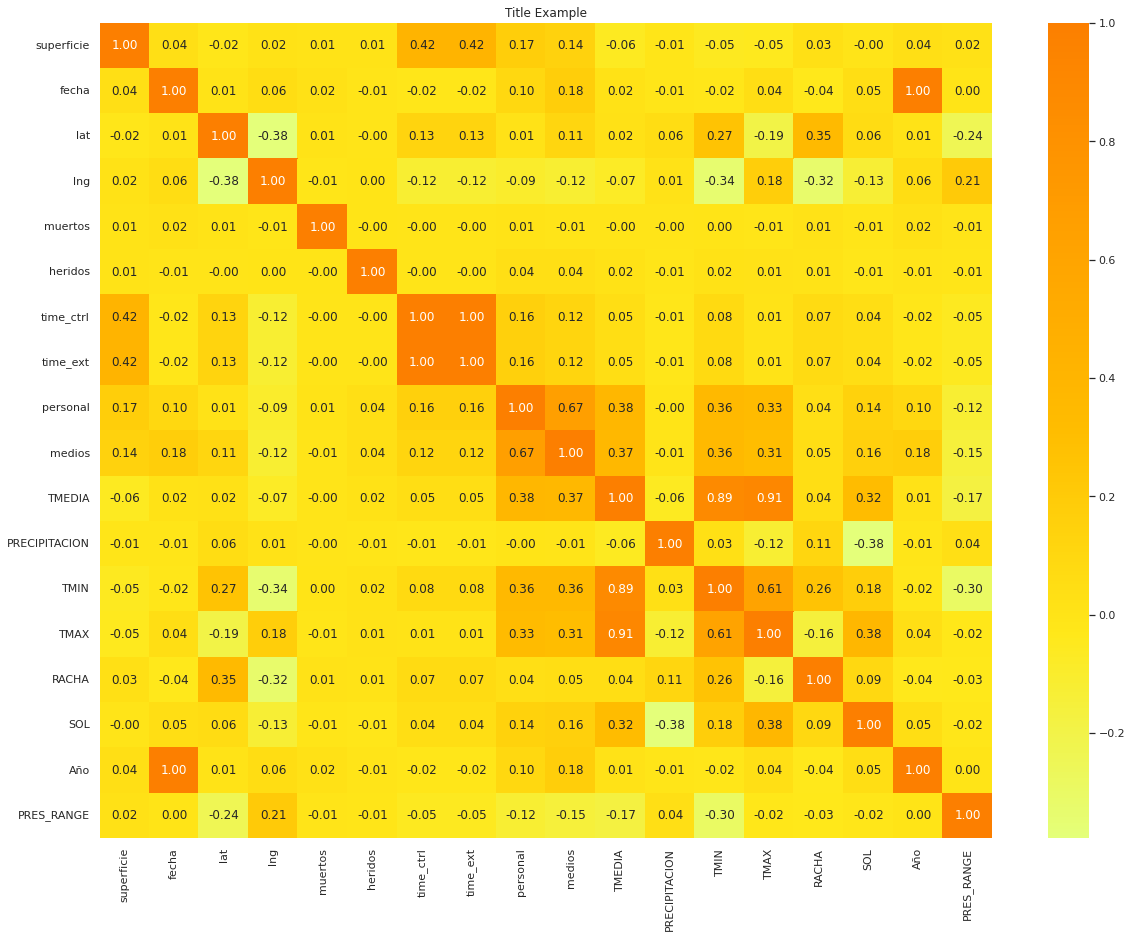

In [ ]:
#Hagamos un HeatMap del df
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia',fmt=".2f")
plt.title("Title Example")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


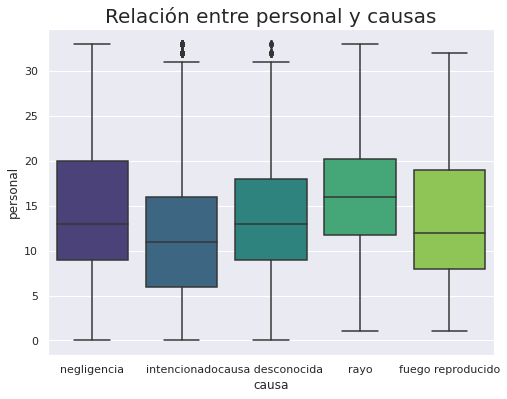

In [ ]:
# Causa vs Personal: notamos que los incendios por causas de negligencia o rayo requirieron mayor cantidad de personal para controlar el incendio
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(df['causa'], df['personal'], palette = 'viridis')
plt.title('Relación entre personal y causas', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


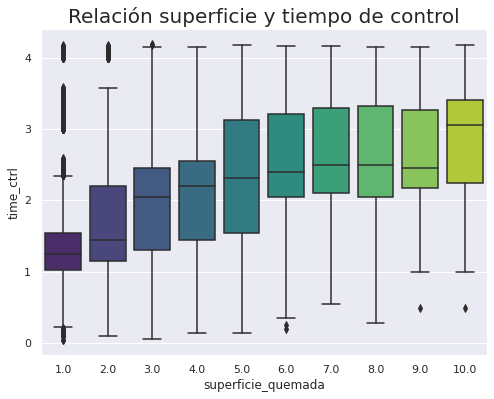

In [ ]:
# En este grafico veremos que a mayor superficie mayor es la cantidad de tiempo para controlarlo.
df['superficie_quemada']= round(df['superficie'],0)      # se redondeo la superficie para tener un grafico acorde
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(df['superficie_quemada'], df['time_ctrl'], palette = 'viridis')
plt.title('Relación superficie y tiempo de control', fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


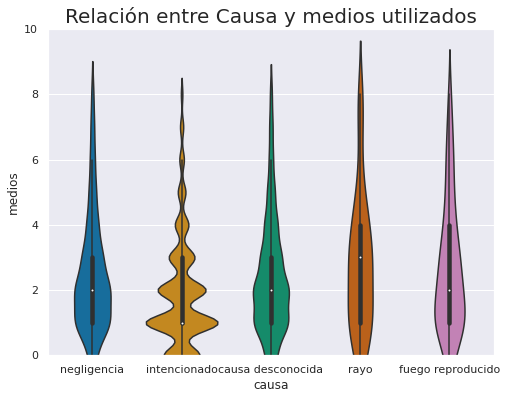

In [ ]:
# Se utilizó mayor cantidad de medios cuando la causa de incendio fue un rayo. De manera inversa, en un incendio intencionado utilizó menor cantidad de medios.
plt.rcParams['figure.figsize'] = (8, 6)
sns.violinplot(df['causa'], df['medios'], palette = 'colorblind')
plt.ylim(0, 10)
plt.title('Relación entre Causa y medios utilizados', fontsize = 20, fontweight = 30)
plt.show()        

Text(0, 0.5, 'Superficie')

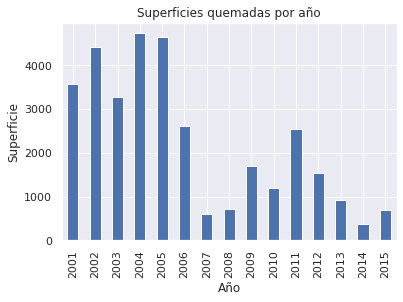

In [ ]:
# Confirmamos que no solo la cantidad de incendios fue mayor desde 2001 a 2005 (visto en analisis univariado) 
# sino que tambien las superficies quemadas fueron mayores en esos años
plt.figure(figsize=(6 ,4))
año=df.groupby('Año')['superficie'].sum().plot(kind='bar')
plt.title("Superficies quemadas por año")
plt.xlabel("Año")
plt.ylabel("Superficie")


Text(0, 0.5, 'Superficie')

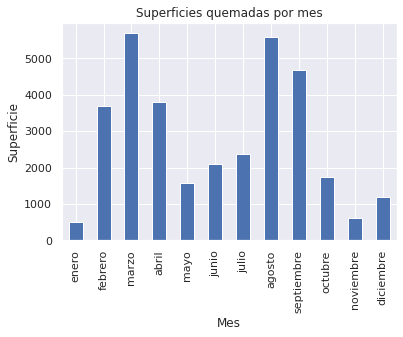

In [ ]:
#Notamos cierta estacionalidad en las superficies quemadas: las mayores se dan en marzo, agosto y septiembre. Mientras que las menores se dan en 
#noviembre, diciembre y enero
plt.figure(figsize=(6 ,4))
año=df.groupby('Mes')['superficie'].sum().plot(kind='bar')
plt.title("Superficies quemadas por mes")
plt.xlabel("Mes")
plt.ylabel("Superficie")


# **ANALISIS MULTIVARIADO**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


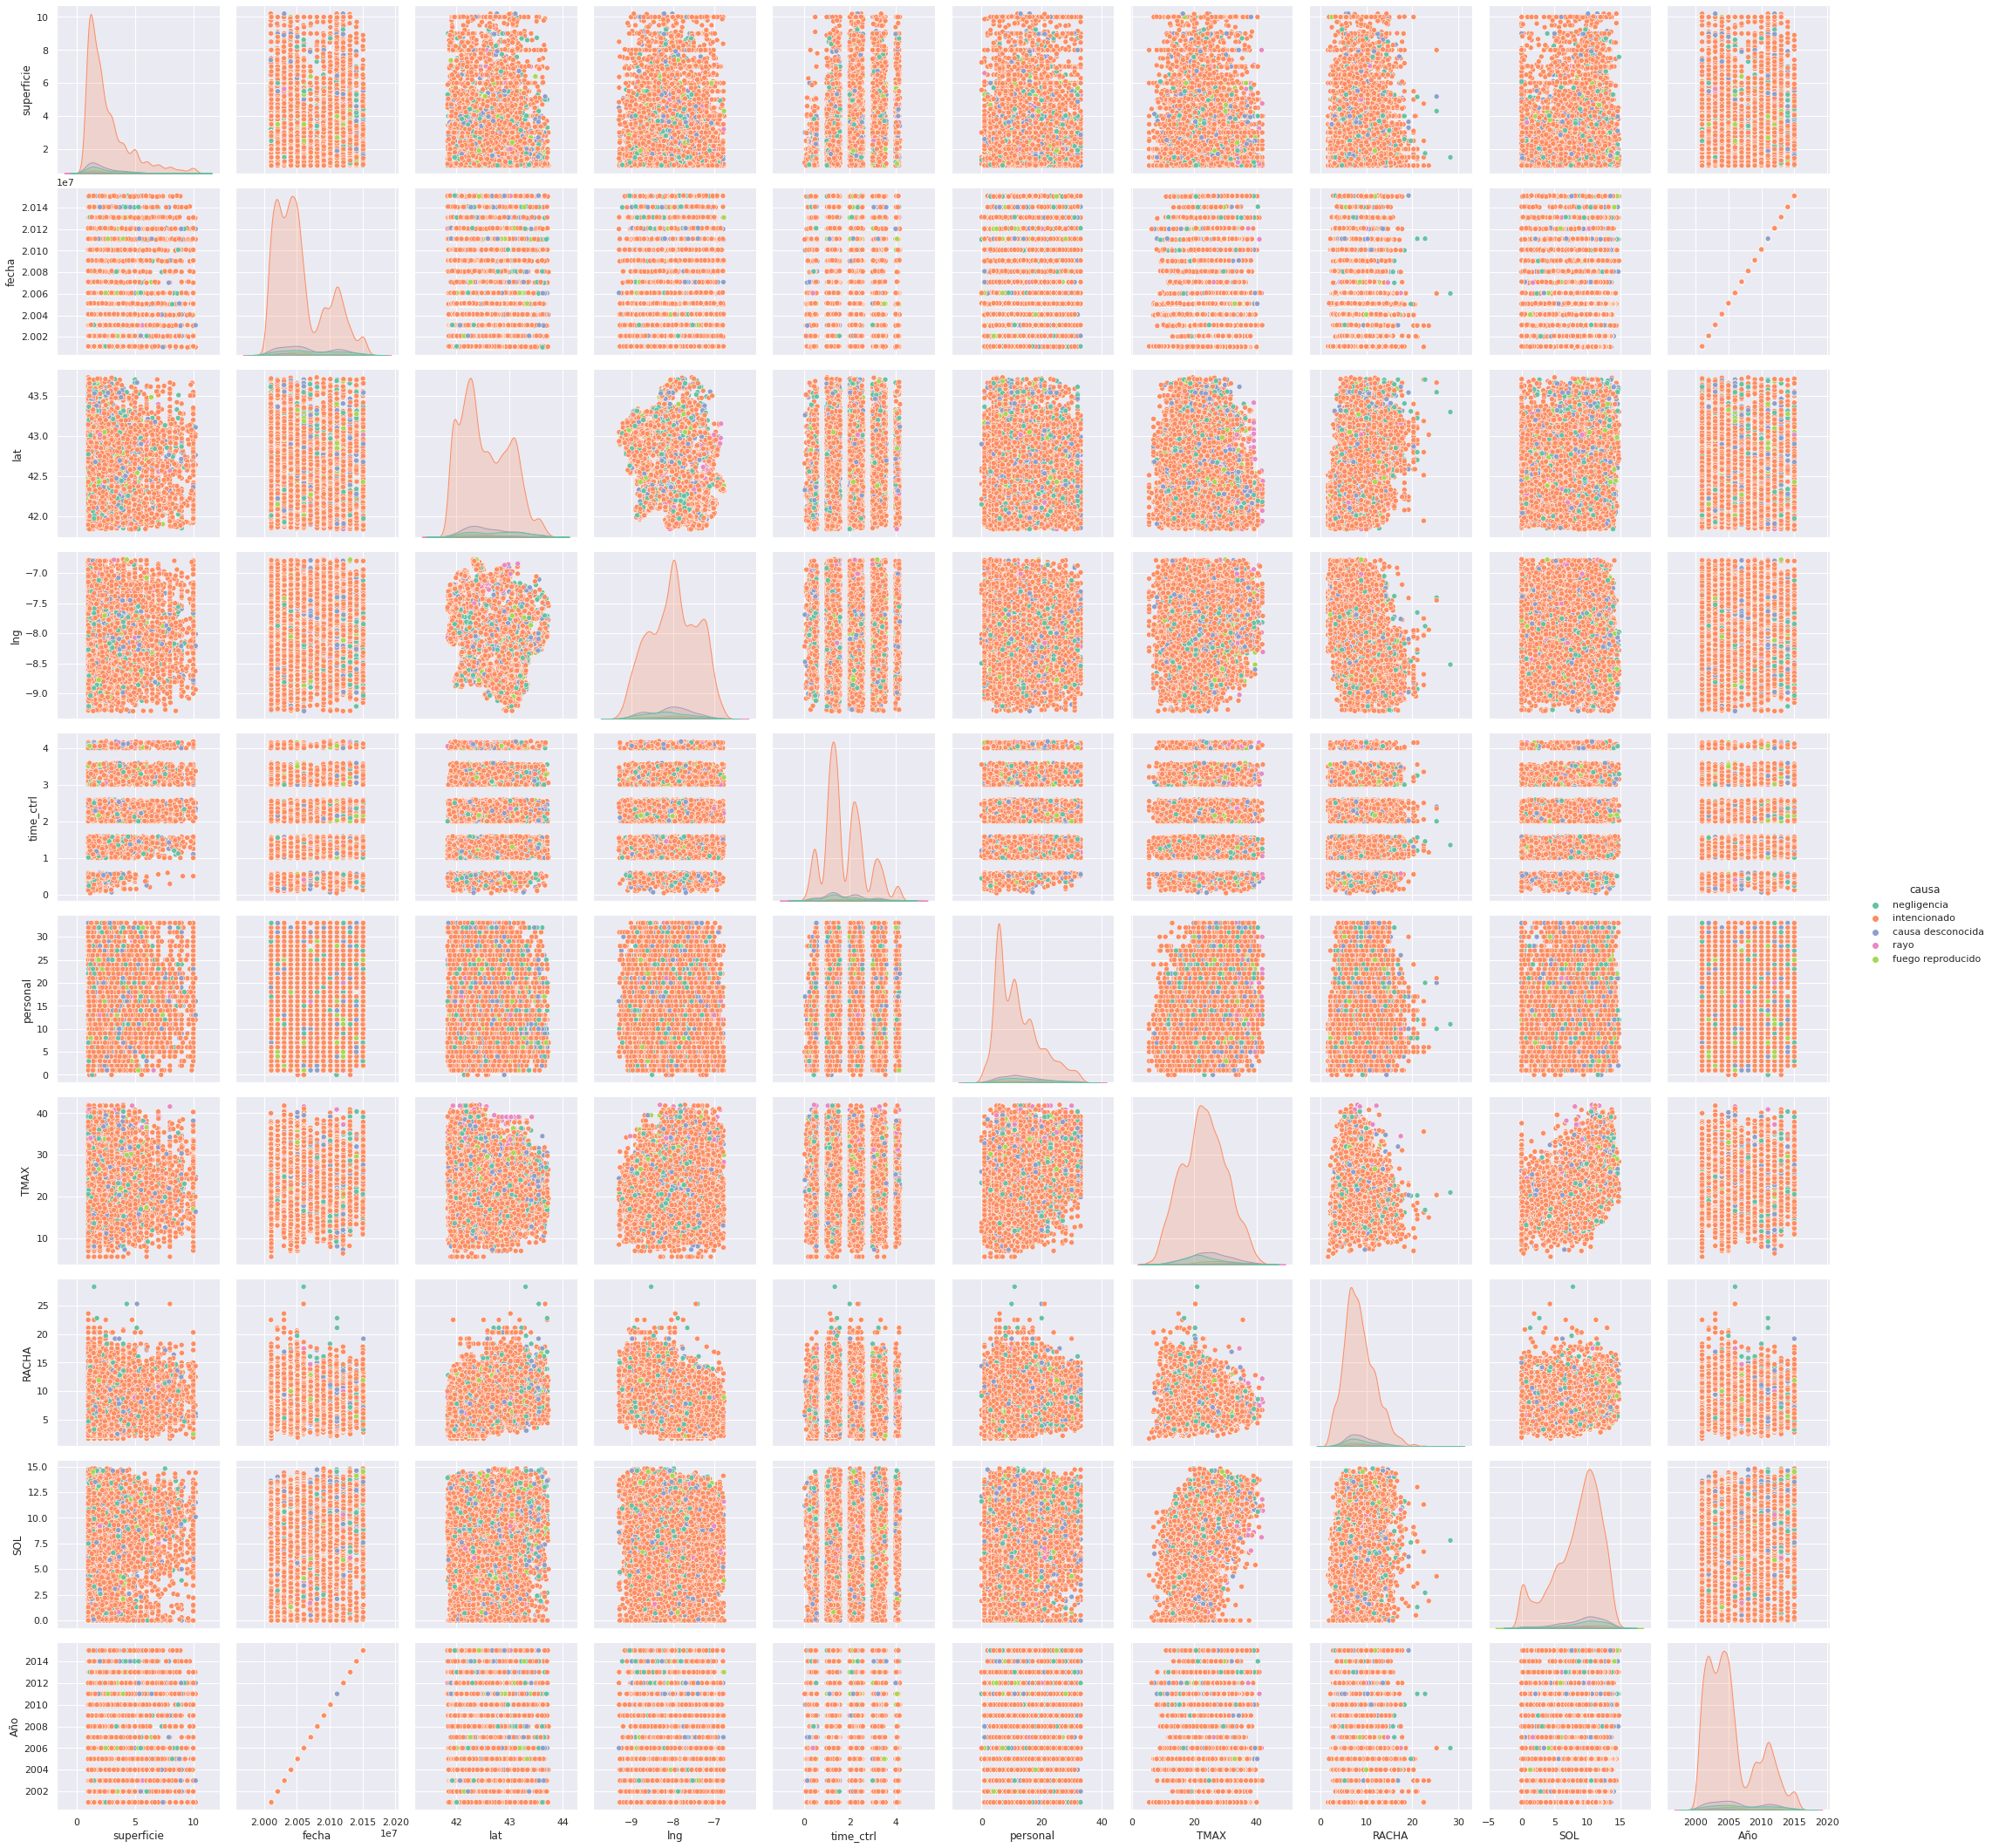

In [ ]:
#Pairplot: cruzamos las variables distinguiendo por causa. No se puede observar patrones claros.
df_=df.drop(columns=['TMIN','TMEDIA','heridos','muertos','time_ext','medios','PRECIPITACION','PRES_RANGE','superficie_quemada'],inplace=False) #Dropeamos algunas columnas para que tener una mejor vista
sns.pairplot(df_,hue = 'causa' , size = 3 , palette = 'Set2')

In [ ]:
# Podemos observar algunas situaciones: hay mayor% de falta de información de gastos que de información.
# En el caso de incendios provocados por rayos, no existen registros que expongan mayores gastos a 5k
# Independientemente las causas, prevalecen los registros que exponen gastos menores a 5k respecto a los que superan los 5k
df.groupby(['causa','gastos']).size()/df.groupby(['causa']).size()

causa              gastos 
causa desconocida  < 5K       0.126506
                   >5K        0.032530
                   NO INFO    0.840964
fuego reproducido  < 5K       0.260465
                   >5K        0.065116
                   NO INFO    0.674419
intencionado       < 5K       0.133800
                   >5K        0.031967
                   NO INFO    0.834234
negligencia        < 5K       0.151685
                   >5K        0.048689
                   NO INFO    0.799625
rayo               < 5K       0.153846
                   NO INFO    0.846154
dtype: float64

In [ ]:
#Observamos que en general habría pocos incendios sin info respecto a la altitud, salvo en caso de que la causa sea un rayo (44% sin info)
df.groupby(['causa','ALTITUD']).size()/df.groupby(['causa']).size()

causa              ALTITUD       
causa desconocida  Entre 80-125      0.145783
                   Inferior a 80     0.275904
                   NO INFO           0.180723
                   Superior a 125    0.397590
fuego reproducido  Entre 80-125      0.320930
                   Inferior a 80     0.153488
                   NO INFO           0.130233
                   Superior a 125    0.395349
intencionado       Entre 80-125      0.156203
                   Inferior a 80     0.271407
                   NO INFO           0.114319
                   Superior a 125    0.458071
negligencia        Entre 80-125      0.181648
                   Inferior a 80     0.408240
                   NO INFO           0.164794
                   Superior a 125    0.245318
rayo               Entre 80-125      0.105769
                   Inferior a 80     0.038462
                   NO INFO           0.442308
                   Superior a 125    0.413462
dtype: float64

# **PCA**

In [ ]:
df.idmunicipio.unique()

array(['CEDEIRA', 'CARBALLO', 'LOUSAME', 'MUXÃ\x83Â\x8dA', 'OUTES',
       'MONFERO', 'SAN SADURNIÃ\x83â\x80\x98O', 'ARTEIXO', 'NOIA',
       'ARANGA', 'BRIÃ\x83â\x80\x9cN', 'SANTIAGO DE COMPOSTELA',
       'VILASANTAR', 'TEO', 'BOQUEIXÃ\x83â\x80\x9cN-CASANOVA', 'BOIRO',
       'SADA', 'NEGREIRA', 'PADRÃ\x83â\x80\x9cN', 'SANTA COMBA',
       'VIMIANZO', 'CABANA DE BERGANTIÃ\x83â\x80\x98OS', 'FISTERRA',
       'ZAS', 'PADERNE', 'NEDA', 'ORDES', 'FRADES', 'TOURO', 'RIANXO',
       'VAL DO DUBRA', 'MIÃ\x83â\x80\x98O', 'CORISTANCO', 'MAZARICOS',
       'OZA DOS RÃ\x83Â\x8dOS', 'NARÃ\x83â\x80\x9cN', 'MELIDE',
       'VALDOVIÃ\x83â\x80\x98O', 'CURTIS', 'CESURAS', 'AMES', 'RIBEIRA',
       'FERROL', 'TORDOIA', 'MESÃ\x83Â\x8dA', 'ROIS', 'TOQUES', 'MUROS',
       'CULLEREDO', 'ARES', 'PORTO DO SON', 'CARRAL', 'ABEGONDO', 'LAXE',
       'CARNOTA', 'CEE', 'MALPICA DE BERGANTIÃ\x83â\x80\x98OS',
       'DUMBRÃ\x83Â\x8dA', 'SANTISO', 'TRAZO', 'PONTECESO', 'VILARMAIOR',
       'ARZÃ\x83Å¡A', 'OLEIROS

Notamos que id municipio tiene demasiados valores distintos, por eso antes de hacer un One Hot Encoding, veremos si podemos dropear esa columna y asi realizar un PCA. Por lo tanto aplicaremos catboost para ver la importancia de dicha variable en la predicción y por lo tanto cuan factible es eliminarla

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier     

In [ ]:
#Hacemos el catboost sobre una copia para no alterar el original
df_prueba= df.copy()

In [ ]:
#Mapeamos las causas (y) a formato numérico para poder utilizar el class_weights de catboost
df_prueba['causa'] = df_prueba.causa.map({
    'negligencia':1, 'intencionado':2, 'causa desconocida':3, 'rayo':4,
       'fuego reproducido':5
})

In [ ]:
#Instanciamos el catboost 
cs = CatBoostClassifier(random_state=42, eval_metric='MultiClass', class_weights={1:5,2:1,3:5,4:5,5:5}, iterations=200)

In [ ]:
#Variables categóricas para catboost
cat_features = ['idprovincia', 'idmunicipio', 'gastos', 'ALTITUD',
       'VELMEDIA', 'Trimestre', 'Mes', 'DIR_VIENTO']

In [ ]:
#Dividimos en X e y 
X = df_prueba.drop('causa', axis=1)
y = df_prueba[['causa']]

In [ ]:
#Fiteamos catboost
cs.fit(X, y, cat_features=cat_features)

Learning rate set to 0.351336
0:	learn: 1.3350722	total: 85.6ms	remaining: 17s
1:	learn: 1.2534782	total: 149ms	remaining: 14.7s
2:	learn: 1.1754551	total: 587ms	remaining: 38.5s
3:	learn: 1.1357933	total: 1.15s	remaining: 56.6s
4:	learn: 1.1090092	total: 1.35s	remaining: 52.7s
5:	learn: 1.0881878	total: 1.6s	remaining: 51.6s
6:	learn: 1.0747266	total: 1.96s	remaining: 54.1s
7:	learn: 1.0474953	total: 2.48s	remaining: 59.4s
8:	learn: 1.0232318	total: 2.97s	remaining: 1m 2s
9:	learn: 1.0163211	total: 3.27s	remaining: 1m 2s
10:	learn: 1.0045227	total: 3.68s	remaining: 1m 3s
11:	learn: 0.9928992	total: 4.24s	remaining: 1m 6s
12:	learn: 0.9896959	total: 4.49s	remaining: 1m 4s
13:	learn: 0.9811747	total: 4.97s	remaining: 1m 6s
14:	learn: 0.9658864	total: 5.43s	remaining: 1m 7s
15:	learn: 0.9624922	total: 5.91s	remaining: 1m 7s
16:	learn: 0.9552258	total: 6.42s	remaining: 1m 9s
17:	learn: 0.9540453	total: 6.89s	remaining: 1m 9s
18:	learn: 0.9510979	total: 6.99s	remaining: 1m 6s
19:	learn: 0.

Text(0.5, 1.0, 'Feature Importance')

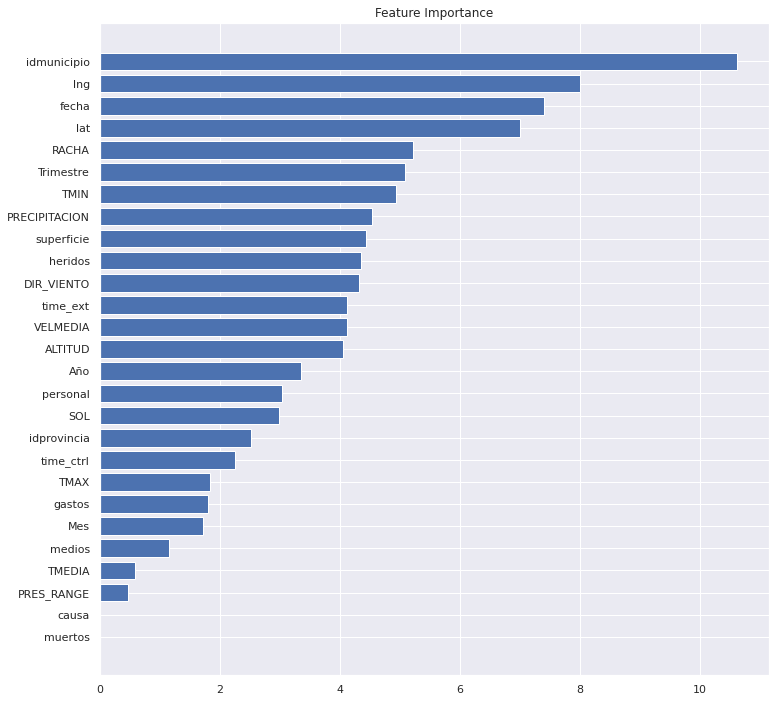

In [ ]:
#Vemos la importancia de las variables. Id municipio tiene gran importancia a la hora de predecir. Conclusion: no se puede dropear para PCA
feature_importance = cs.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df.columns)[sorted_idx])
plt.title('Feature Importance')

No podemos dropear la columna id municipio con lo cual comenzamos PCA

Comenzamos a realizar One hot encoding con las variables que no tienen un orden (como si lo tiene por ejemplo, los meses del año)

In [ ]:
df_prueba2= df.copy()

In [ ]:
#Se realiza One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore') #Si se agregaría otra variable seguiría funcionando
temporal = ohe.fit_transform(df_prueba2[['idprovincia','idmunicipio','DIR_VIENTO']]).toarray()

columns = []
for x in ohe.categories_:
    for y in x:
        columns.append(y)
_ohe = pd.DataFrame(temporal, columns=columns)
df.reset_index(drop=True, inplace=True)
_ohe.reset_index(drop=True, inplace=True)
df_prueba2= pd.concat([df, _ohe],axis=1)
df_prueba2.drop(['idprovincia','idmunicipio','DIR_VIENTO'], axis=1, inplace=True)

In [ ]:
#Mapeamos las variables categoricas que tienen un orden
df_prueba2['gastos'] = df_prueba2.gastos.map({
    'NO INFO':-1, '< 5K ':1, '>5K':2
})

df_prueba2['VELMEDIA'] = df_prueba2.VELMEDIA.map({
    '2-4 m/s':2, '4-6 m/s':3, '< 2 m/s':1, '6-8 m/s':4, '> 8 m/s':5
})

df_prueba2['ALTITUD'] = df_prueba2.ALTITUD.map({
    'Inferior a 80':1, 'NO INFO':-1, 'Superior a 125':3, 'Entre 80-125':2
})

df_prueba2['Trimestre'] = df_prueba2.Trimestre.map({
    'Q1':1, 'Q2':2, 'Q3':3, 'Q4':4
})

df_prueba2['Mes'] = df_prueba2.Mes.map({
    'enero':1, 'febrero':2, 'marzo':3, 'abril':4, 'mayo':5, 'junio':6, 'julio':7, 'agosto':8, 'septiembre':9, 'octubre':10,'noviembre':11, 'diciembre':12
})

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Instanciamos standar scaler
se=StandardScaler()

In [ ]:
#Dropeamos causa para hacer PSA
df_prueba2.drop('causa',axis=1,inplace=True)

In [ ]:
# Escalamos los datos
df_prueba2=pd.DataFrame(se.fit_transform(df_prueba2),columns=df_prueba2.columns)

In [ ]:
#Instanciar PCA 
from sklearn.decomposition import PCA
pca=PCA(random_state=42,n_components=0.9)

In [ ]:
#Transformamos el data frame
df_decomp=pca.fit_transform(df_prueba2)

In [ ]:
#Mostramos cantidad de columnas (254, que son las componentes que explican el 90% de variabilidad)
df_decomp.shape

(12976, 254)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(random_state=42,n_components=50) #Pedimos que tome las primeras 50 componentes principales

In [ ]:
#Transformamos el data frame
df_decomp=pca.fit_transform(df_prueba2)

In [ ]:
#Vemos cuanta variabilidad (en %) explican las primeras 50 componentes
pca.explained_variance_ratio_.sum()

0.22513040155099306

**Conclusión:** las primeras 50 componentes principales explican menos del 25% de la variabilidad de los datos; esto se explica por la esparcidad de la variable id municipio. Con lo cual no creemos que sea lo ideal aplicar PCA. Por otro lado, en principio utilizaríamos arboles de decision para el modelo de ML, con lo cual, se podría prescindir en primera instancia de este analisis.

# **DATA WRANGLING FINAL**

In [9]:
# Mapeamos la variable target. Esto se deberá confirmar con el avance del proyecto (en caso de no necesitar "one hot encoding")
df['causa']= df['causa'].map({'negligencia':1,'intencionado':2,'rayo':3,'causa desconocida':4,'fuego reproducido':5})

In [11]:
# Mapeamos distintas variables (altitud y gastos). Esto se deberá confirmar con el avance del proyecto (en caso de no necesitar "one hot encoding")
df['ALTITUD']= df['ALTITUD'].map({'Inferior a 80':1, 'NO INFO':-1, 'Superior a 125':3, 'Entre 80-125':2})
df['gastos']= df['gastos'].map({'NO INFO':-1, '< 5K ':1, '>5K':2})


In [12]:
# Vemos la última muestra del dataframe
df.head()

superficie     fecha        lat  ...   Año DIR_VIENTO PRES_RANGE
0         5.0  20010220  43.703581  ...  2001          E        4.4
1         1.5  20010225  43.186836  ...  2001         NE        4.7
2         1.5  20010413  43.699889  ...  2001         NE        3.2
3         1.1  20010413  42.758649  ...  2001         NE        3.2
4         1.5  20010413  43.063218  ...  2001         NE        3.2

[5 rows x 27 columns]

#Como conclusión final de esta primera entrega, y según lo observado en base a los análisis que hemos hecho, modificamos ciertas variables para que sean interpretadas de una mejor forma para un futuro modelo de Machine Learning, aún no sabemos de manera acertada cuál usaremos, así que el dataset final momentaneamente cuenta con estas variables, ya que la efectividad de los modelos de clasificación y predicción dependenden totalmente de estas.